In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
#Required database
DKP_data4 = pd.read_csv('DKP_N.csv', sep=";")
DKP_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          784 non-null    object 
 1   Molecule Name               99 non-null     object 
 2   Molecule Max Phase          784 non-null    object 
 3   Molecular Weight            784 non-null    float64
 4   #RO5 Violations             784 non-null    int64  
 5   AlogP                       784 non-null    float64
 6   Compound Key                784 non-null    object 
 7   Smiles                      784 non-null    object 
 8   Standard Type               784 non-null    object 
 9   Standard Relation           562 non-null    object 
 10  Standard Value              563 non-null    float64
 11  Standard Units              539 non-null    object 
 12  pChEMBL Value               359 non-null    float64
 13  Data Validity Comment       0 non-n

In [3]:
#Modify Coulmns names
DKP_data4.rename(columns = {'Molecule ChEMBL ID':'Mol_ID'}, inplace=True)
DKP_data4.rename(columns = {'Standard Value':'standard_value'}, inplace=True)
DKP_data4.rename(columns = {'Document Journal':'Document_Journal'}, inplace=True)
DKP_data4.rename(columns = {'Document ChEMBL ID':'Document_ID'}, inplace=True)
DKP_data4.rename(columns = {'Target Name':'Target_Name'}, inplace=True)
DKP_data4.rename(columns = {'Source Description':'Source_Description'}, inplace=True)
DKP_data4.rename(columns = {'Standard Type':'Standard_Type'}, inplace=True)
DKP_data4.rename(columns = {'Document Year':'Document_Year'}, inplace=True)






In [4]:
#Check No of targest
DKP_data4.Target_Name.nunique()

39

In [5]:
#Define No of records per year
DKP_data4.Document_Year.value_counts()

2014.0    207
2016.0    170
2012.0    156
2020.0     84
2019.0     47
2007.0     45
2018.0     33
2022.0     13
2017.0     10
2010.0      8
2011.0      3
2000.0      3
1997.0      2
2015.0      1
2008.0      1
Name: Document_Year, dtype: int64

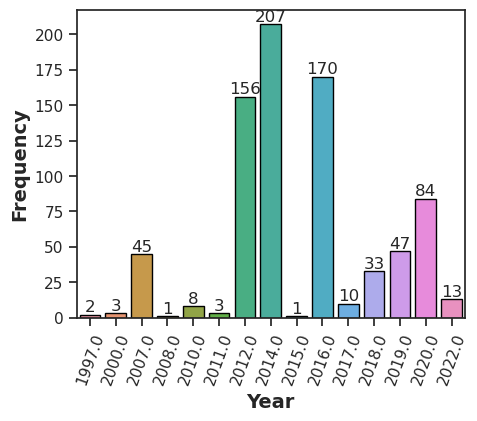

In [6]:

plt.figure(figsize=(5, 4))


ax = sns.countplot(x='Document_Year', data=DKP_data4, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=70)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Year.pdf')

In [7]:
#Save the modified data base
DKP_data4.to_csv("DKP_Modified_columns.csv")

In [8]:
#Define Number of compounds using CHEMBL ID
DKP_data4.Mol_ID.nunique()

201

In [9]:
# define data sources
DKP_data4.Source_Description.value_counts()

Scientific Literature      738
Patent Bioactivity Data     45
PubChem BioAssays            1
Name: Source_Description, dtype: int64

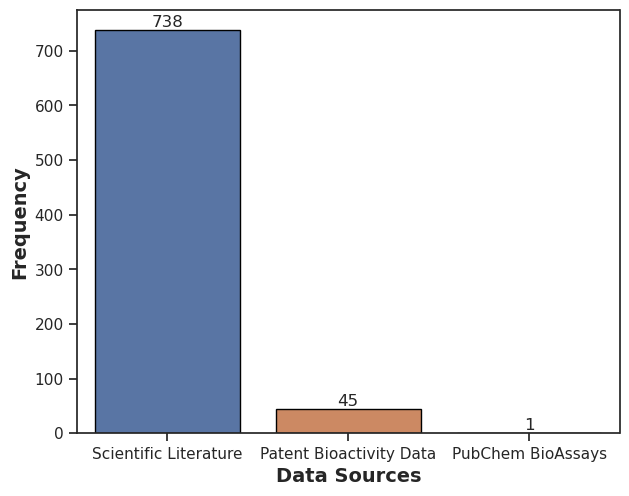

In [10]:
# plot sources
plt.figure(figsize=(7, 5.5))

ax = sns.countplot(x='Source_Description', data=DKP_data4,
                   order = DKP_data4['Source_Description'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Data Sources', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Sources.pdf')



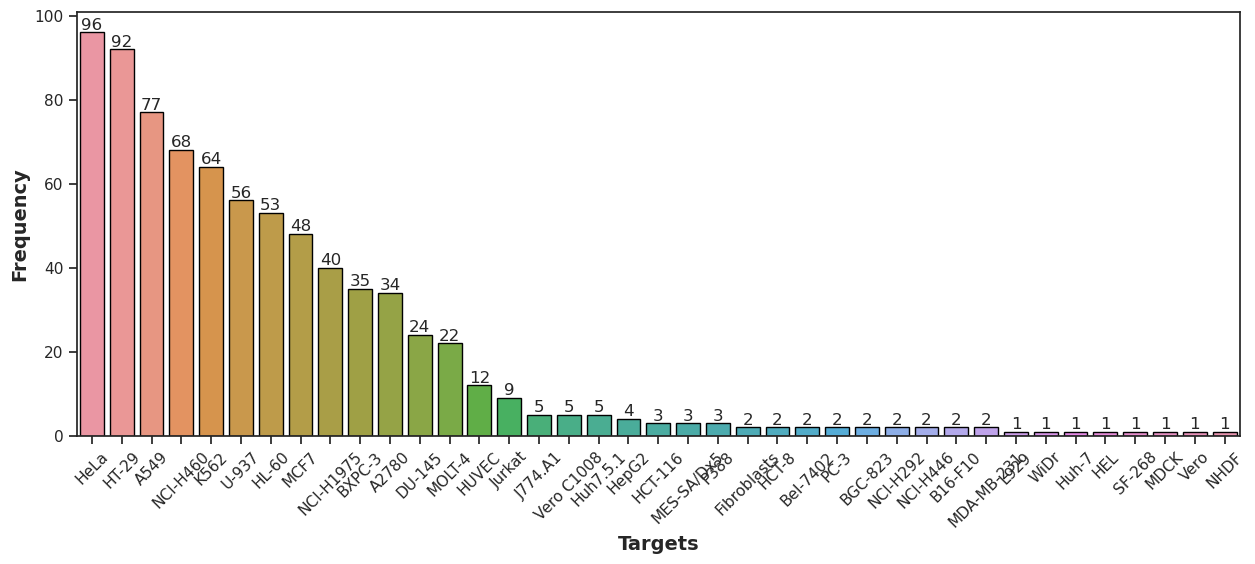

In [11]:
#plot Target names
plt.figure(figsize=(15, 5.5))

ax = sns.countplot(x='Target_Name', data=DKP_data4, order = DKP_data4['Target_Name'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Targets', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Targets.pdf')

In [12]:
# Modify Journals names
DKP_data4['Document_Journal'] = DKP_data4['Document_Journal'].replace(to_replace = 'Eur J Med Chem', value = 'Eur. J. Med. Chem.')
DKP_data4['Document_Journal'] = DKP_data4['Document_Journal'].replace(to_replace = 'Bioorg Med Chem', value = 'Bioorg. Med. Chem.')
DKP_data4['Document_Journal'] = DKP_data4['Document_Journal'].replace(to_replace = 'J Med Chem', value = 'J. Med. Chem.')
DKP_data4['Document_Journal'] = DKP_data4['Document_Journal'].replace(to_replace = 'Bioorg Med Chem Lett', value = 'Bioorg. Med. Chem. Lett.')
DKP_data4['Document_Journal'] = DKP_data4['Document_Journal'].replace(to_replace = 'J Nat Prod', value = 'J. Nat. Prod.')




In [13]:
#Number of research papers
DKP_data4.Document_ID.nunique()


32

In [14]:
#Define Number of records per journal
DKP_data4.Document_Journal.nunique()


6

In [15]:
#list Names Of journals
DKP_data4.Document_Journal.value_counts()

Eur. J. Med. Chem.          366
Bioorg. Med. Chem.          197
Bioorg. Med. Chem. Lett.     69
J. Med. Chem.                61
J. Nat. Prod.                25
ACS Med Chem Lett            20
Name: Document_Journal, dtype: int64

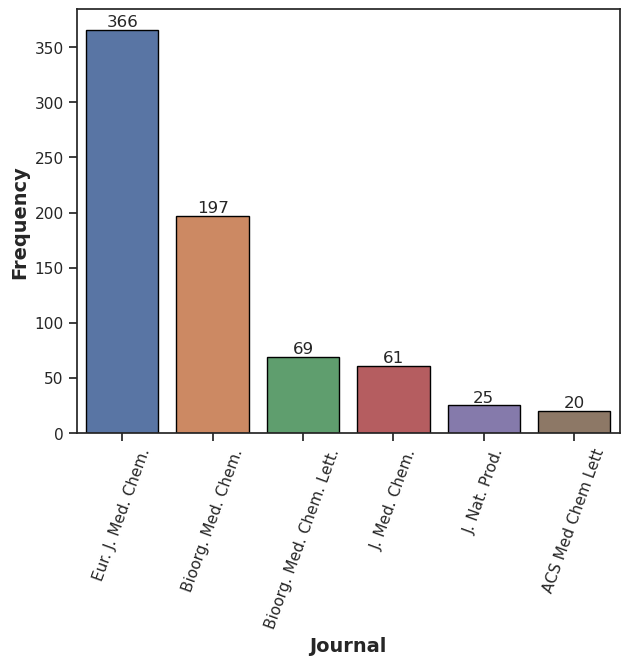

In [16]:
plt.figure(figsize=(7, 5.5))


ax = sns.countplot(x='Document_Journal', data=DKP_data4, order = DKP_data4['Document_Journal'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Journal', fontsize=14, fontweight='bold')
plt.xticks(rotation=70)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Journals.pdf')

In [17]:
#Most tasted compound
DKP_data4.Mol_ID.value_counts()

CHEMBL1096380    99
CHEMBL4063810    37
CHEMBL3289279    20
CHEMBL2024561    19
CHEMBL3342339    13
                 ..
CHEMBL2024535     1
CHEMBL3982855     1
CHEMBL2024097     1
CHEMBL2024533     1
CHEMBL4636649     1
Name: Mol_ID, Length: 201, dtype: int64

In [18]:
#generate database for most tasted compound
options = ['CHEMBL1096380'] 
result = DKP_data4[DKP_data4['Mol_ID'].isin(options)] 
#Save Data base
result.to_csv("Plinabulin.csv")
result

,Mol_ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard_Type,Standard Relation,...,Target Organism,Target Type,Document_ID,Source ID,Source_Description,Document_Journal,Document_Year,Cell ChEMBL ID,Properties,Action Type
23,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,1,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Inhibition,NaN,...,Homo sapiens,CELL-LINE,CHEMBL3352421,1,Scientific Literature,ACS Med Chem Lett,2014.0,CHEMBL3308376,NaN,NaN
40,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,"1, NPI-2358, KPU-2",CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL1641522,1,Scientific Literature,Bioorg. Med. Chem.,2011.0,CHEMBL3307768,NaN,NaN
48,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,KPU-02; NPI-2358; tBu-delta-PLH,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Ratio IC50,'>',...,Homo sapiens,CELL-LINE,CHEMBL3881525,38,Patent Bioactivity Data,NaN,2007.0,CHEMBL3307960,NaN,NaN
49,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,KPU-02; NPI-2358; tBu-delta-PLH,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,TGI,NaN,...,Homo sapiens,CELL-LINE,CHEMBL3881525,38,Patent Bioactivity Data,NaN,2007.0,CHEMBL3308403,NaN,NaN
50,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,KPU-02; NPI-2358; tBu-delta-PLH,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Ratio IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL3881525,38,Patent Bioactivity Data,NaN,2007.0,CHEMBL3307654,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,NPI-2358,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Activity,'=',...,Homo sapiens,CELL-LINE,CHEMBL4715742,1,Scientific Literature,Eur. J. Med. Chem.,2016.0,CHEMBL3308006,Dose = 0.015 microM | TIME = 48.0 hr,NaN
759,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,Plinabulin,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Activity,'=',...,Homo sapiens,CELL-LINE,CHEMBL4392834,1,Scientific Literature,Bioorg. Med. Chem.,2019.0,CHEMBL3307651,NaN,NaN
761,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,NPI-2358,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Activity,'=',...,Homo sapiens,CELL-LINE,CHEMBL4715742,1,Scientific Literature,Eur. J. Med. Chem.,2016.0,CHEMBL3308006,Dose = 0.015 microM | TIME = 48.0 hr,NaN
771,CHEMBL1096380,PLINABULIN,3.0,336.4,0,0.74,Plinabulin,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,Inhibition,'=',...,Homo sapiens,CELL-LINE,CHEMBL4392834,1,Scientific Literature,Bioorg. Med. Chem.,2019.0,CHEMBL3307651,NaN,NaN


In [19]:
#targets for plinabulin
result.Target_Name.value_counts()


HeLa          17
A549          14
U-937         12
NCI-H1975      8
HT-29          8
HUVEC          7
MCF7           5
DU-145         5
Jurkat         4
NCI-H460       3
HL-60          3
BXPC-3         2
K562           2
NCI-H446       1
MES-SA/Dx5     1
NCI-H292       1
B16-F10        1
HepG2          1
PC-3           1
MDA-MB-231     1
HCT-116        1
MOLT-4         1
Name: Target_Name, dtype: int64

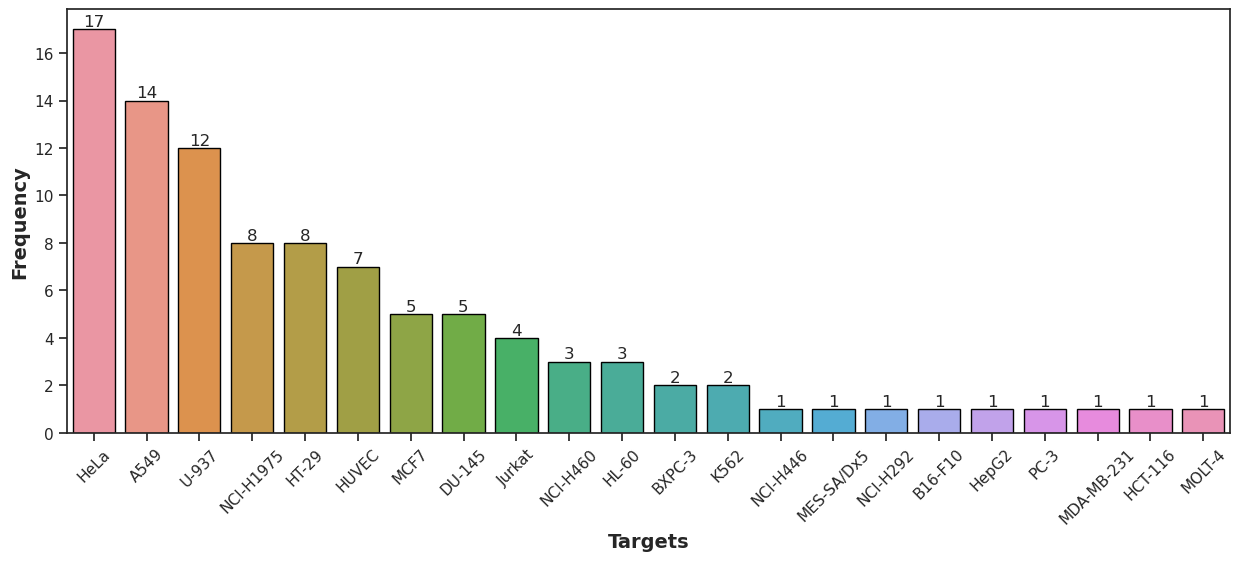

In [20]:
plt.figure(figsize=(15, 5.5))

ax = sns.countplot(x='Target_Name', data=result, order = result['Target_Name'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Targets', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Targets_Plinabulin.pdf')

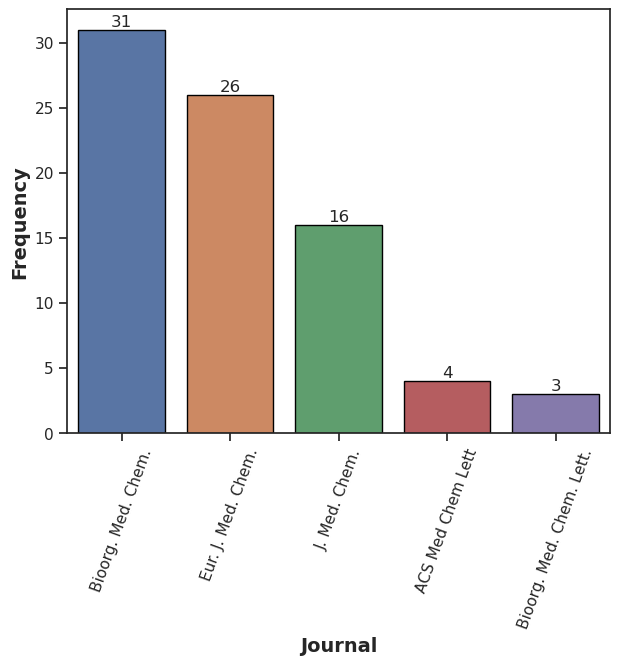

In [21]:
#Journals for Plinabulin
plt.figure(figsize=(7, 5.5))


ax = sns.countplot(x='Document_Journal', data=result, order = result['Document_Journal'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Journal', fontsize=14, fontweight='bold')
plt.xticks(rotation=70)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Journals.pdf')

In [22]:
#recorded Standard types
DKP_data4.Standard_Type.value_counts()


IC50          585
Activity       97
Inhibition     42
Ratio IC50     22
CC50           11
TGI            10
Ratio EC50      8
T/C             5
FC              2
Potency         1
LD50            1
Name: Standard_Type, dtype: int64

In [23]:
#database for records with IC50 
options = ['IC50'] 
result2 = DKP_data4[DKP_data4['Standard_Type'].isin(options)] 
result2.to_csv("DKP_IC50.csv")
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 3 to 781
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mol_ID                      585 non-null    object 
 1   Molecule Name               38 non-null     object 
 2   Molecule Max Phase          585 non-null    object 
 3   Molecular Weight            585 non-null    float64
 4   #RO5 Violations             585 non-null    int64  
 5   AlogP                       585 non-null    float64
 6   Compound Key                585 non-null    object 
 7   Smiles                      585 non-null    object 
 8   Standard_Type               585 non-null    object 
 9   Standard Relation           414 non-null    object 
 10  standard_value              414 non-null    float64
 11  Standard Units              414 non-null    object 
 12  pChEMBL Value               359 non-null    float64
 13  Data Validity Comment       0 non-n

In [24]:
result2["Standard Units"].value_counts()

nM    414
Name: Standard Units, dtype: int64

In [25]:
# Used Assays
result2["Assay Description"].nunique()

62

In [26]:
result3 = pd.read_csv("DKP_IC50.csv", index_col=0)
result3.dropna(subset = ['standard_value'], inplace=True)
result3

,Mol_ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard_Type,Standard Relation,...,Target Organism,Target Type,Document_ID,Source ID,Source_Description,Document_Journal,Document_Year,Cell ChEMBL ID,Properties,Action Type
3,CHEMBL3342335,NaN,None,398.42,0,0.98,5,Cc1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2cccc(C(=O)c3...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL3352421,1,Scientific Literature,ACS Med Chem Lett,2014.0,CHEMBL3307768,NaN,NaN
4,CHEMBL3342336,NaN,None,348.36,0,1.76,9,CC(=O)N1CC(=O)N/C(=C\c2cccc(C(=O)c3ccccc3)c2)C1=O,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL3352421,1,Scientific Literature,ACS Med Chem Lett,2014.0,CHEMBL3307768,NaN,NaN
7,CHEMBL2031713,NaN,None,325.41,0,2.22,13b,CC(C)=CCc1[nH]c2ccccc2c1C[C@H]1NC(=O)[C@H](C)N...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL2029224,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2012.0,CHEMBL3308421,NaN,NaN
8,CHEMBL2031709,NaN,None,401.51,0,3.45,6b,CC(C)=CCc1[nH]c2ccccc2c1C[C@@H]1NC(=O)[C@H](Cc...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL2029224,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2012.0,CHEMBL3308378,NaN,NaN
9,CHEMBL2031714,NaN,None,391.48,0,2.17,14b,CC(C)=CCc1[nH]c2ccccc2c1C[C@@H]1NC(=O)[C@H](Cc...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL2029224,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2012.0,CHEMBL3308378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,CHEMBL4797507,NaN,None,368.48,0,2.31,3e,C=CCn1c(=O)/c(=C/CCCCCC)[nH]c(=O)/c1=C/c1ccc(O...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4715742,1,Scientific Literature,Eur. J. Med. Chem.,2016.0,CHEMBL3308034,TIME = 72.0 hr,NaN
766,CHEMBL4740826,NaN,None,326.40,0,1.14,1b,C=CCn1c(=O)/c(=C/CCC)[nH]c(=O)/c1=C/c1ccccc1OC,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4715742,1,Scientific Literature,Eur. J. Med. Chem.,2016.0,CHEMBL3308378,TIME = 72.0 hr,NaN
769,CHEMBL4640318,NaN,None,430.44,0,2.25,14c,O=c1[nH]/c(=C\c2nc[nH]c2C2CC2)c(=O)[nH]/c1=C\c...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4627367,1,Scientific Literature,Bioorg. Med. Chem.,2020.0,CHEMBL3307637,NaN,NaN
780,CHEMBL1096380,PLINABULIN,3.0,336.40,0,0.74,Plinabulin,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4627367,1,Scientific Literature,Bioorg. Med. Chem.,2020.0,CHEMBL3307677,NaN,NaN


In [27]:
result3.dropna(subset = ['standard_value'], inplace=True)


In [28]:
# classifing activity for records with IC50 
bioactivity_threshold = []
for i in result3.standard_value:
  if float(i) >= 5000:
    bioactivity_threshold.append("> 5 Micromolar")
  elif float(i) <= 1000:
    bioactivity_threshold.append("Nano molar")
  else:
    bioactivity_threshold.append("< 5 Micromolar")
    

In [29]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
bioactivity_class.value_counts()

Nano molar        208
> 5 Micromolar    147
< 5 Micromolar     59
Name: class, dtype: int64

In [30]:
#research papers with IC50
result2.Document_ID.nunique()



21

In [31]:
DKP_data4.Standard_Type.value_counts()
dkpx= DKP_data4[["standard_value"]].dropna()
dkpx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 783
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   standard_value  563 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [32]:
#Measurable Standard Unites
DKP_data4['Standard Units'].value_counts()

nM    426
%     107
g       5
uM      1
Name: Standard Units, dtype: int64

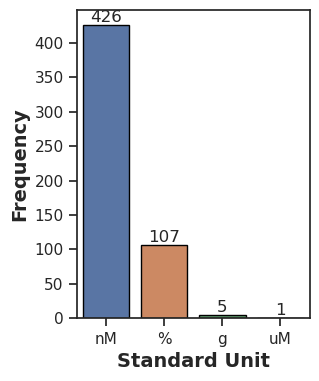

In [33]:
plt.figure(figsize=(3, 4))

ax = sns.countplot(x='Standard Units', data=DKP_data4, order = DKP_data4['Standard Units'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Standard Unit', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Units.pdf')

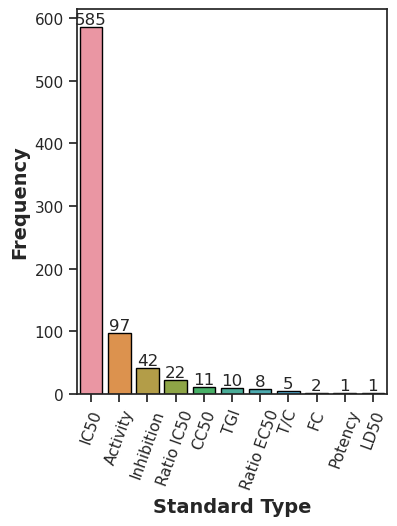

In [34]:
#Measurable Standard Types
plt.figure(figsize=(4, 5))

ax = sns.countplot(x='Standard_Type', data=DKP_data4, order = DKP_data4['Standard_Type'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Standard Type', fontsize=14, fontweight='bold')
plt.xticks(rotation= 70)

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Type.pdf')

In [35]:
 #lipinski
#Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [41]:
DKP_data4.dropna(subset = ['standard_value'], inplace=True)


In [42]:
bioactivity_threshold = []
for i in DKP_data4.standard_value:
  if float(i) >= 5000:
    bioactivity_threshold.append("> 5 Micromolar")
  elif float(i) <= 1000:
    bioactivity_threshold.append("Nano molar")
  else:
    bioactivity_threshold.append("< 5 Micromolar")

In [43]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
bioactivity_class.value_counts()

Nano molar        345
> 5 Micromolar    158
< 5 Micromolar     60
Name: class, dtype: int64

In [44]:
df_lipinski = lipinski(DKP_data4.Smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,325.412,2.15310,2.0,3.0
1,395.418,1.34680,2.0,4.0
2,398.422,0.98332,3.0,4.0
3,348.358,1.76340,1.0,4.0
4,325.412,2.22220,3.0,2.0
...,...,...,...,...
558,560.742,5.60660,2.0,4.0
559,336.395,0.74140,3.0,3.0
560,469.266,3.00770,2.0,4.0
561,220.253,-0.63620,2.0,3.0


In [45]:
mol_id = []
for i in DKP_data4.Mol_ID:
    mol_id.append(i)
canonical_smiles = []
for i in DKP_data4.Smiles:
    canonical_smiles.append(i)   
standard_value = []
for i in DKP_data4.standard_value:
    standard_value.append(i)
Standard_Type = []
for i in DKP_data4.Standard_Type:
    Standard_Type.append(i)
    
selection = list(zip(mol_id, canonical_smiles, standard_value, bioactivity_class, Standard_Type))
DKP_data5 = pd.DataFrame( selection, columns = ['mol_id', 'canonical_smiles', 'standard_value', 'bioactivity_class', 'Standard_Type'])
DKP_data5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mol_id             563 non-null    object 
 1   canonical_smiles   563 non-null    object 
 2   standard_value     563 non-null    float64
 3   bioactivity_class  563 non-null    object 
 4   Standard_Type      563 non-null    object 
dtypes: float64(1), object(4)
memory usage: 22.1+ KB


In [46]:
DKP_data_lip = pd.concat([DKP_data5,df_lipinski], axis=1)
DKP_data_lip 

,mol_id,canonical_smiles,standard_value,bioactivity_class,Standard_Type,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3417739,CC(C)=CCn1cc(C[C@@H]2NC(=O)[C@H](C)NC2=O)c2ccc...,200000.0,> 5 Micromolar,CC50,325.412,2.15310,2.0,3.0
1,CHEMBL3342339,O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccc...,10.0,Nano molar,Ratio IC50,395.418,1.34680,2.0,4.0
2,CHEMBL3342335,Cc1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2cccc(C(=O)c3...,15.0,Nano molar,IC50,398.422,0.98332,3.0,4.0
3,CHEMBL3342336,CC(=O)N1CC(=O)N/C(=C\c2cccc(C(=O)c3ccccc3)c2)C1=O,8800.0,> 5 Micromolar,IC50,348.358,1.76340,1.0,4.0
4,CHEMBL2031713,CC(C)=CCc1[nH]c2ccccc2c1C[C@H]1NC(=O)[C@H](C)N...,86200.0,> 5 Micromolar,IC50,325.412,2.22220,3.0,2.0
...,...,...,...,...,...,...,...,...,...
558,CHEMBL5094766,NCCC[C@H]1C(=O)N(Cc2ccc(-c3ccccc3)cc2)[C@@H](C...,30.0,Nano molar,LD50,560.742,5.60660,2.0,4.0
559,CHEMBL1096380,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,26.2,Nano molar,IC50,336.395,0.74140,3.0,3.0
560,CHEMBL4636649,O=c1[nH]/c(=C\c2ccc(Br)o2)c(=O)[nH]/c1=C\c1ccc...,361.1,Nano molar,IC50,469.266,3.00770,2.0,4.0
561,CHEMBL5078927,C=c1[nH]c(=O)/c(=C/c2ccsc2)[nH]c1=O,20000.0,> 5 Micromolar,CC50,220.253,-0.63620,2.0,3.0


In [47]:
DKP_data_lip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mol_id             563 non-null    object 
 1   canonical_smiles   563 non-null    object 
 2   standard_value     563 non-null    float64
 3   bioactivity_class  563 non-null    object 
 4   Standard_Type      563 non-null    object 
 5   MW                 563 non-null    float64
 6   LogP               563 non-null    float64
 7   NumHDonors         563 non-null    float64
 8   NumHAcceptors      563 non-null    float64
dtypes: float64(5), object(4)
memory usage: 39.7+ KB


In [48]:
options = ['IC50'] 
result2 = DKP_data4[DKP_data4['Standard_Type'].isin(options)] 
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 3 to 781
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mol_ID                      414 non-null    object 
 1   Molecule Name               37 non-null     object 
 2   Molecule Max Phase          414 non-null    object 
 3   Molecular Weight            414 non-null    float64
 4   #RO5 Violations             414 non-null    int64  
 5   AlogP                       414 non-null    float64
 6   Compound Key                414 non-null    object 
 7   Smiles                      414 non-null    object 
 8   Standard_Type               414 non-null    object 
 9   Standard Relation           414 non-null    object 
 10  standard_value              414 non-null    float64
 11  Standard Units              414 non-null    object 
 12  pChEMBL Value               359 non-null    float64
 13  Data Validity Comment       0 non-n

In [49]:
DKP_data6 = DKP_data_lip.dropna()
DKP_data6.dropna()

,mol_id,canonical_smiles,standard_value,bioactivity_class,Standard_Type,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3417739,CC(C)=CCn1cc(C[C@@H]2NC(=O)[C@H](C)NC2=O)c2ccc...,200000.0,> 5 Micromolar,CC50,325.412,2.15310,2.0,3.0
1,CHEMBL3342339,O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccc...,10.0,Nano molar,Ratio IC50,395.418,1.34680,2.0,4.0
2,CHEMBL3342335,Cc1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2cccc(C(=O)c3...,15.0,Nano molar,IC50,398.422,0.98332,3.0,4.0
3,CHEMBL3342336,CC(=O)N1CC(=O)N/C(=C\c2cccc(C(=O)c3ccccc3)c2)C1=O,8800.0,> 5 Micromolar,IC50,348.358,1.76340,1.0,4.0
4,CHEMBL2031713,CC(C)=CCc1[nH]c2ccccc2c1C[C@H]1NC(=O)[C@H](C)N...,86200.0,> 5 Micromolar,IC50,325.412,2.22220,3.0,2.0
...,...,...,...,...,...,...,...,...,...
558,CHEMBL5094766,NCCC[C@H]1C(=O)N(Cc2ccc(-c3ccccc3)cc2)[C@@H](C...,30.0,Nano molar,LD50,560.742,5.60660,2.0,4.0
559,CHEMBL1096380,CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C/c2ccccc...,26.2,Nano molar,IC50,336.395,0.74140,3.0,3.0
560,CHEMBL4636649,O=c1[nH]/c(=C\c2ccc(Br)o2)c(=O)[nH]/c1=C\c1ccc...,361.1,Nano molar,IC50,469.266,3.00770,2.0,4.0
561,CHEMBL5078927,C=c1[nH]c(=O)/c(=C/c2ccsc2)[nH]c1=O,20000.0,> 5 Micromolar,CC50,220.253,-0.63620,2.0,3.0


In [50]:
options = ['IC50'] 
result2 = DKP_data6[DKP_data6['Standard_Type'].isin(options)] 
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 2 to 560
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mol_id             414 non-null    object 
 1   canonical_smiles   414 non-null    object 
 2   standard_value     414 non-null    float64
 3   bioactivity_class  414 non-null    object 
 4   Standard_Type      414 non-null    object 
 5   MW                 414 non-null    float64
 6   LogP               414 non-null    float64
 7   NumHDonors         414 non-null    float64
 8   NumHAcceptors      414 non-null    float64
dtypes: float64(5), object(4)
memory usage: 32.3+ KB


In [51]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = DKP_data5[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = DKP_data5[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

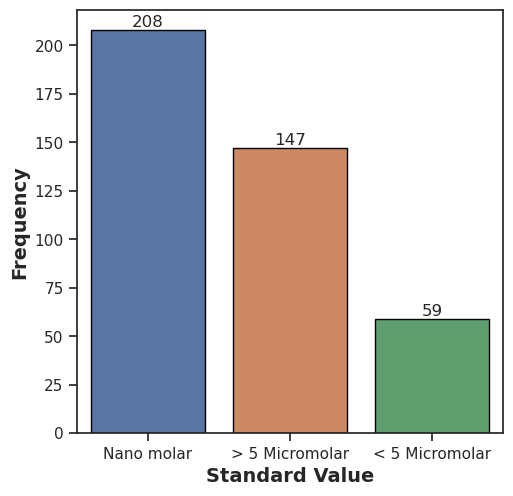

In [52]:
plt.figure(figsize=(5.5, 5.5))

ax = sns.countplot(x='bioactivity_class', data=result2, order = result2['bioactivity_class'].value_counts().index, edgecolor='black')
ax.bar_label(ax.containers[0])

plt.xlabel('Standard Value', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Standard Value.pdf')

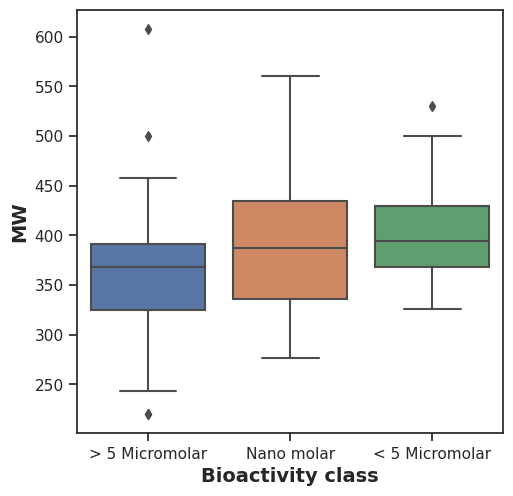

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = DKP_data6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

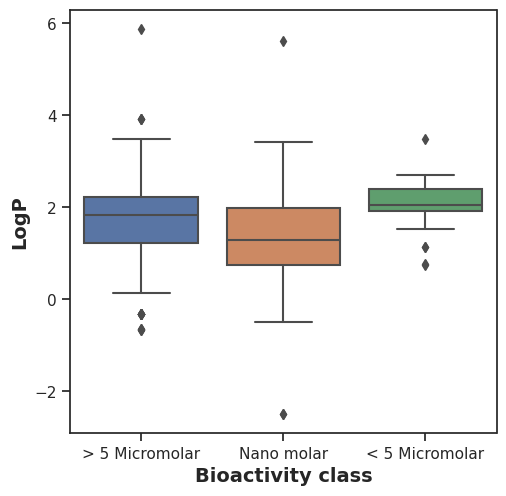

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = DKP_data6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

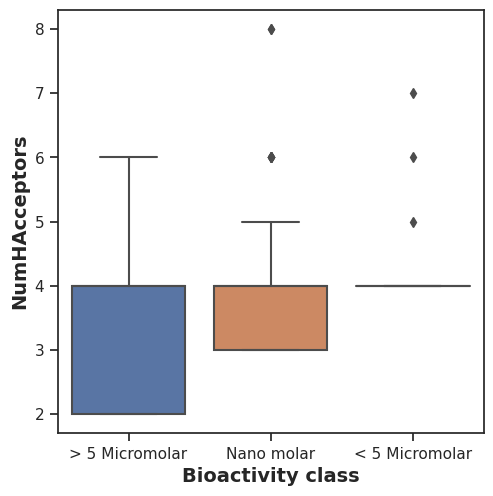

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = DKP_data6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

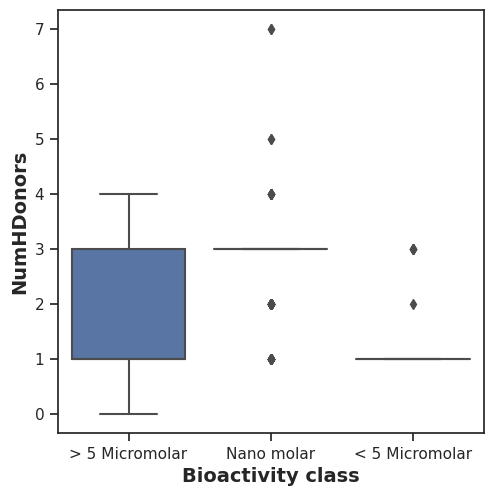

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = DKP_data6)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [57]:
DKP_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 783
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mol_ID                      563 non-null    object 
 1   Molecule Name               84 non-null     object 
 2   Molecule Max Phase          563 non-null    object 
 3   Molecular Weight            563 non-null    float64
 4   #RO5 Violations             563 non-null    int64  
 5   AlogP                       563 non-null    float64
 6   Compound Key                563 non-null    object 
 7   Smiles                      563 non-null    object 
 8   Standard_Type               563 non-null    object 
 9   Standard Relation           562 non-null    object 
 10  standard_value              563 non-null    float64
 11  Standard Units              531 non-null    object 
 12  pChEMBL Value               359 non-null    float64
 13  Data Validity Comment       0 non-n

In [58]:
options = ['IC50'] 
result2 = DKP_data4[DKP_data4['Standard_Type'].isin(options)] 
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 3 to 781
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mol_ID                      414 non-null    object 
 1   Molecule Name               37 non-null     object 
 2   Molecule Max Phase          414 non-null    object 
 3   Molecular Weight            414 non-null    float64
 4   #RO5 Violations             414 non-null    int64  
 5   AlogP                       414 non-null    float64
 6   Compound Key                414 non-null    object 
 7   Smiles                      414 non-null    object 
 8   Standard_Type               414 non-null    object 
 9   Standard Relation           414 non-null    object 
 10  standard_value              414 non-null    float64
 11  Standard Units              414 non-null    object 
 12  pChEMBL Value               359 non-null    float64
 13  Data Validity Comment       0 non-n